Author: Naomi Baes and Chat GPT

## Create test corpus

In [ ]:
#%run get_test_corpus.py # run to create a test corpus

## Inspect WordNet synsets for candidate targets

Note: The WordNet corpus reader gives access to the Open Multilingual WordNet, using ISO-639 language codes. (https://www.nltk.org/howto/wordnet.html)

In [1]:
# Access the version information
from nltk.corpus import wordnet as wn
print(f"WordNet version: {wn.get_version()}")

WordNet version: 3.0


In [2]:
%run get_wordnet_synset-terms.py


Processing term: trauma

Synset: injury.n.01
Definition: any physical damage to the body caused by violence or accident or fracture etc.
Lemma names: ['injury', 'hurt', 'harm', 'trauma']
Examples: []
Hypernyms: [Synset('ill_health.n.01')]
Hyponyms: [Synset('birth_trauma.n.01'), Synset('blast_trauma.n.01'), Synset('bleeding.n.01'), Synset('blunt_trauma.n.01'), Synset('brain_damage.n.01'), Synset('bruise.n.01'), Synset('bump.n.01'), Synset('burn.n.03'), Synset('dislocation.n.03'), Synset('electric_shock.n.02'), Synset('fracture.n.01'), Synset('frostbite.n.01'), Synset('intravasation.n.01'), Synset('penetrating_trauma.n.01'), Synset('pinch.n.02'), Synset('rupture.n.01'), Synset('sting.n.03'), Synset('strain.n.07'), Synset('wale.n.01'), Synset('whiplash.n.01'), Synset('wound.n.01'), Synset('wrench.n.01')]
Siblings: {'malady', 'unfitness', 'invalidism', 'unwellness', 'affliction', 'softness', 'sickness', 'biliousness', 'infection', 'illness', 'dyscrasia', 'pathology'}
-------
Synset: traum

# Get eligible siblings to inject into the corpus

This script generates a custom Information Content (IC) file by focusing on both psychology-related synsets and broader context-relevant synsets derived from a specified corpus. Here’s a breakdown of its operations and criteria:
Script Breakdown

1.    POS-Specific Synset Matching:
    - Each term’s synsets are retrieved according to its part of speech (POS), ensuring IC values accurately represent each term's contextual usage in the corpus. During processing, each token in the corpus is assigned a POS tag, which is mapped to the corresponding WordNet POS format.
    -    Only synsets matching the token’s POS in the corpus are counted, refining IC calculations to reflect usage-specific nuances.

2.    Domain and Contextual Synset Inclusion:
    -    A set of psychology-related target terms is specified (e.g., "trauma," "anxiety"). Instead of filtering strictly by psychology domain, the script broadens the context by including all sibling synsets (synsets sharing the same hypernyms) and any common hypernyms. This approach allows for an inclusive dataset that captures both psychology-related and broader relevant terms, without narrowly filtering based on domain-specific criteria.

3.    Identification of Relevant Synsets:
    -    For each target term, the script identifies all associated synsets in WordNet that match the term’s POS within the corpus. It also includes “sibling” synsets (those sharing hypernyms) and common hypernyms for each target-sibling pair, broadening the scope to encompass related terms without applying a strict psychology-only filter.

4.    Corpus Processing:
    -    The script tokenizes and preprocesses each sentence in the corpus, normalizing specified multi-word target terms (e.g., "mental health") for consistent matching.
    -    For each token in the corpus, the script checks for matches against target terms or relevant synsets (including siblings and common hypernyms).
    -    Only matching tokens are further processed:
        -    Each matching token receives a POS tag.
        -    The POS tag is used to retrieve the corresponding POS-specific synset(s) in WordNet.
        -    Occurrences of each relevant synset are counted, establishing frequencies for IC calculation and ensuring these values reflect context-specific occurrences of target terms and related synsets.

5.    Information Content Calculation:
    -    Using the frequency data, the script calculates IC for each relevant synset with the formula: IC = −log(probability), where probability is derived from the frequency of each synset in the corpus.
    -    The script uses POS-specific frequencies to ensure that IC values capture context-sensitive usages, such as distinguishing “anxiety” as a noun from other potential usages.

6.    Output the IC File:
    -    The IC values are saved to an output file (ic-psychology.dat) in a format compatible with WordNet’s information content methods, including each synset’s unique identifier (POS-specific offset) and its calculated IC value.

*Additional Notes*
-    Matched and Unmatched Synsets: The script outputs a file listing synsets found and not found in the corpus, allowing for verification of represented synsets and supporting consistency in IC calculation and further analysis.
-    Application: The IC file can be applied to NLP tasks such as calculating semantic similarity, with a focus on psychology-related terms while also accommodating broader contextual concepts for more nuanced analyses.

In [ ]:
#%run step0_psychology-IC.py # get psychology corpus and synset specific information contet (IC) file to compute Lin similarity in the next step. Output file = "ic-psychology.dat"

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naomi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naomi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\naomi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Processing input file: 5796467it [1:47:25, 899.28it/s] 

IC file saved at output/donor_terms/ic-psychology.dat


This script identifies psychology-related "sibling" terms (words with similar meanings or contexts) for a set of target terms, leveraging both WordNet synsets and BERT embeddings to assess semantic similarity at the sense level. The script includes custom Information Content (IC) loading, domain relevance filtering, and a combination of structural and contextual similarity calculations to identify and evaluate related terms. Key steps include:
Script Breakdown

 1.   Loading Information Content (IC):
    -    Custom IC values are loaded from a file to support Lin similarity calculations, measuring semantic similarity based on shared information between synsets.

2.    Filtering Synsets by Domain Relevance:
    -    Psychology-related synsets are identified by checking definitions for keywords associated with psychology (e.g., "mental," "anxiety," "depression").
        For each target term, the script identifies relevant synsets, then includes their sense-specific "sibling" synsets (co-hyponyms sharing common hypernyms) if they meet psychological relevance criteria, thus expanding the list of contextually relevant terms.

3.    Semantic Similarity Calculation:
    -    Lin Similarity (using IC values): Calculates semantic similarity between target and sibling synsets based on shared specificity. This is achieved by finding the Least Common Subsumer (LCS) of each sense pair and comparing their IC values.
            Threshold for Eligibility: Siblings with a Lin similarity below a specified threshold (0.5 by default) are marked as "ineligible."
    -    Cosine Similarity (BERT embeddings): For each target-sibling pair, cosine similarity is calculated between sense-specific embeddings using BioBERT.
            Threshold for Eligibility: Siblings with a cosine similarity below 0.7 are marked as "ineligible."

4.    Result Filtering and Classification:
    -    Siblings are marked as "Eligible" if they meet both Lin similarity and cosine similarity thresholds; otherwise, they are labeled "Below threshold(s)." This filtering ensures that only the most contextually relevant and semantically close siblings are retained for analysis.

5.    Result Output:
    -    The script outputs two CSV files:
        -    Eligible Siblings: Contains sibling terms meeting the similarity criteria, along with Lin and cosine similarity scores, definitions, and the target term.
        -    Ineligible Siblings: Contains siblings that fall below the thresholds, with information on why they were filtered out.
    -    This output supports subsequent analysis by providing a refined set of psychology-related terms that are both structurally and contextually similar to the target terms.

*Summary*: This script generates a set of psychology-relevant synonyms and related terms for each target term, filtered by sense-specific structural and contextual similarity using Lin and cosine similarity measures. This output is well-suited for applications requiring nuanced semantic analysis in the psychology domain, such as NLP tasks involving similarity, categorization, or expansion of related terms in psychological contexts.

The Lin similarity between two synsets s1s1​ and s2s2​ is defined by the following formula:
Lin similarity(s1,s2)=2×IC(LCS(s1,s2))IC(s1)+IC(s2)
Lin similarity(s1​,s2​)=IC(s1​)+IC(s2​)2×IC(LCS(s1​,s2​))​

where:

    IC: Information Content, which measures how specific or informative a concept is within a corpus. It is calculated as IC(s)=−log⁡(P(s))IC(s)=−log(P(s)), where P(s)P(s) is the probability of the synset ss occurring in a corpus.
    LCS: Least Common Subsumer, the most specific common ancestor (hypernym) of the two synsets s1s1​ and s2s2​ in the WordNet hierarchy.

Explanation:

    Numerator: 2×IC(LCS(s1,s2))2×IC(LCS(s1​,s2​)) gives twice the IC of the LCS of s1s1​ and s2s2​, representing the shared information between the two synsets.
    Denominator: IC(s1)+IC(s2)IC(s1​)+IC(s2​) represents the total information content of both synsets, balancing the formula by accounting for each synset's specificity.

Interpretation:

The Lin similarity formula yields values in the range [0,1][0,1], where:

    1 indicates maximum similarity (when s1s1​ and s2s2​ are identical).
    0 indicates no similarity (when s1s1​ and s2s2​ have no shared information).

In practice, this metric quantifies how much two concepts share in terms of hierarchical structure, relative to their specificity in the corpus.

In [1]:
%run step1_eligible_siblings-DIRECT.py # only get direct siblings

c:\Users\naomi\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Processing term: trauma
Checking if injury.n.01 is psychology-related: False
Checking if trauma.n.02 is psychology-related: True
Retrieved siblings for trauma.n.02: ['mental_health.n.01', 'state_of_mind.n.01', 'enchantment.n.02', 'morale.n.01', 'abulia.n.01', 'identity_crisis.n.01', 'depression.n.01', 'hallucinosis.n.01', 'anxiety.n.01', 'hypnosis.n.01', 'anhedonia.n.01', 'agitation.n.01', 'mental_illness.n.01', 'delusion.n.01', 'depersonalization.n.02', 'fugue.n.02', 'irritation.n.01', 'cognitive_state.n.01', 'nervousness.n.02', 'elation.n.01', 'dissociation.n.02']
  Evaluating sibling: mental_health.n.01 - the psychological state of someone who is functioning at a satisfactory level of emotional and behavioral adjustment
    Similarities for mental_health.n.01 - Lin: 1.54662159587515, Cosine: 0.8627195954322815
    mental_health.n.01 meets thresholds. Adding to eligible.
  Evaluating sibling: state_of_mind.n.01 - a temporary psychological state
    Similarities for state_of_mind.n.0

c:\Users\naomi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


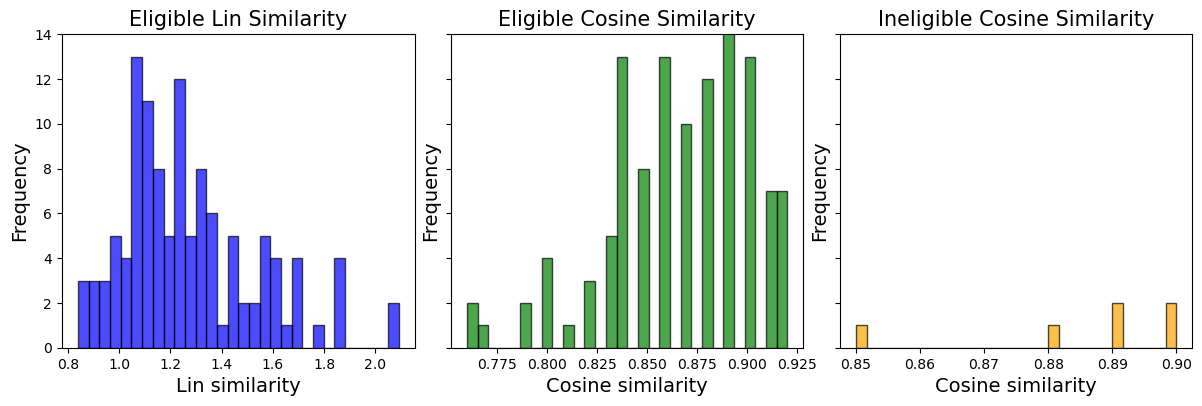

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load eligible and ineligible data
eligible_file = "output/donor_terms/siblings_eligible.csv"
ineligible_file = "output/donor_terms/siblings_ineligible.csv"

eligible_df = pd.read_csv(eligible_file)
ineligible_df = pd.read_csv(ineligible_file)

# Check if the Ineligible Lin Similarity column has non-null values
include_ineligible_lin = not ineligible_df["lin_similarity"].dropna().empty

# Define number of subplots based on whether ineligible lin similarity has data
num_plots = 4 if include_ineligible_lin else 3

# Set up the figure with adjusted dimensions and fonts for better readability in Overleaf
fig, axs = plt.subplots(1, num_plots, figsize=(12, 4), sharey=True)
y_limit = 14

# Plotting function with larger font sizes and optimized spacing
def plot_similarity_distributions(ax, df, metric, title, color):
    formatted_metric = metric.replace("_", " ").capitalize()
    ax.hist(df[metric].dropna().round(2), bins=30, alpha=0.7, color=color, edgecolor="black")
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(formatted_metric, fontsize=14)
    ax.set_ylabel("Frequency", fontsize=14)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0, y_limit)

# Plot Eligible Lin Similarity
plot_similarity_distributions(axs[0], eligible_df, "lin_similarity", "Eligible Lin Similarity", "blue")

# Plot Eligible Cosine Similarity
plot_similarity_distributions(axs[1], eligible_df, "cosine_similarity", "Eligible Cosine Similarity", "green")

# Plot Ineligible Lin and Cosine Similarity based on availability
if include_ineligible_lin:
    plot_similarity_distributions(axs[2], ineligible_df, "lin_similarity", "Ineligible Lin Similarity", "red")
    plot_similarity_distributions(axs[3], ineligible_df, "cosine_similarity", "Ineligible Cosine Similarity", "orange")
else:
    plot_similarity_distributions(axs[2], ineligible_df, "cosine_similarity", "Ineligible Cosine Similarity", "orange")

# Adjust layout and padding
plt.subplots_adjust(wspace=0.3)
plt.tight_layout(pad=0.5)

# Show the plot with all available subplots
plt.show()

# Save the plot without the "Ineligible Lin Similarity" plot
if include_ineligible_lin:
    fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
    plot_similarity_distributions(axs[0], eligible_df, "lin_similarity", "Eligible Lin Similarity", "blue")
    plot_similarity_distributions(axs[1], eligible_df, "cosine_similarity", "Eligible Cosine Similarity", "green")
    plot_similarity_distributions(axs[2], ineligible_df, "cosine_similarity", "Ineligible Cosine Similarity", "orange")
    plt.subplots_adjust(wspace=0.3)
    plt.tight_layout(pad=0.5)
    plt.savefig("output/similarity_distributions.png", dpi=300, bbox_inches="tight")

# End of notebook